# Time Series Visualization: Life Expectancy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from IPython.core.display import HTML
%config InlineBackend.figure_format='retina'

In [3]:
def set_spines(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

In [4]:
life = pd.read_csv('life-expectancy.csv')

In [5]:
life_new = life[((life['Entity']=='Norway') | (life['Entity']=='Japan') | (life['Entity']=='United States') | (life['Entity']=='China') | (life['Entity']=='Germany') 
                 | (life['Entity']=='Philippines')| (life['Entity']=='Africa')| (life['Entity']=='Russia')| (life['Entity']=='Mexico'))]

In [6]:
colors = {'United States':'darkseagreen','China':'xkcd:faded orange','Norway':'cadetblue','Japan':'palevioletred',
          'Germany':'slategrey', 'Philippines':'xkcd:light plum', 'Africa':'rosybrown', 'Russia':'indianred', 'Mexico':'seagreen'}

In [7]:
def update(Year):

    data = life_new[life_new['Year']==Year].sort_values('Life expectancy', ascending=True)
    ax.clear()
    
    x = data['Entity']
    y = data['Life expectancy']
    cols = [colors[country] for country in x.values]
    
    ax.barh(x, y, color = cols)
    ax.set_xticks([])
    ax.set_yticks([])

    ax.text(-22, 9, f'Life Expectancy in {Year}', fontname='Futura', fontsize=35)
    for i,exp in enumerate(y):
        ax.text(val+2,i, f'{np.round(exp,2)} years', fontname = 'Futura', color = cols[i], fontsize=16)
    for i,country in enumerate(x):
        ax.text(-22,i, country, fontname = 'Futura', fontsize=16)
    
    set_spines(ax)    
    ax.set_xlim([-25,100])

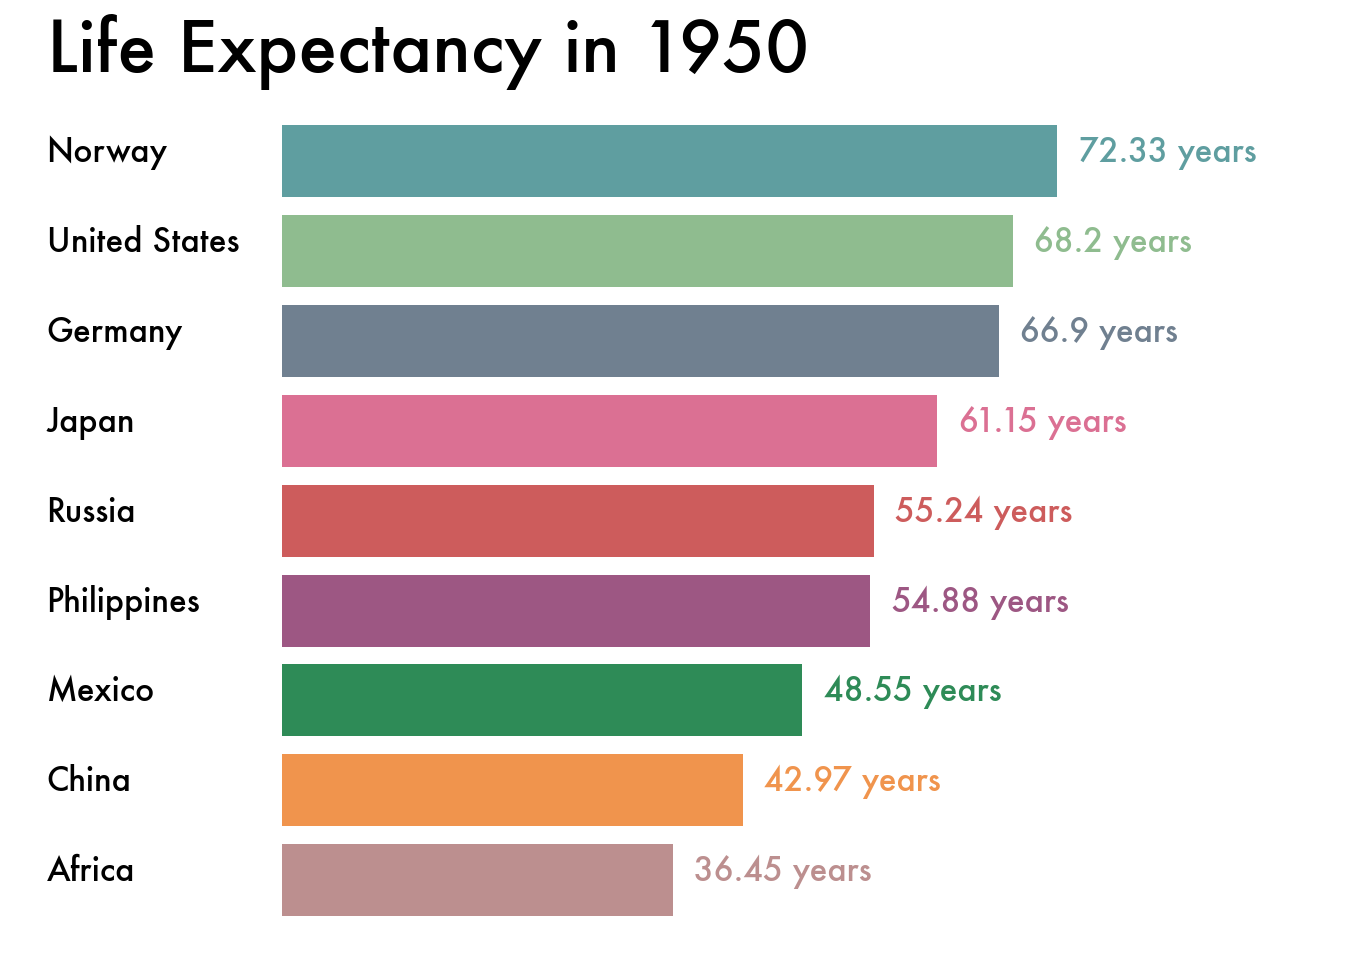

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
years = range(1950, 2018)
animator = animation.FuncAnimation(fig, update, frames=range(1950,2018), interval = 170, repeat=True, blit=False, repeat_delay = 2000)
HTML(animator.to_jshtml()) 

In [12]:
animator.save('myAnimation.gif', writer='imagemagick', fps=1000)